# Importing Libraries

In [146]:
# Importing Libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pickle
from tqdm import tqdm

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some plot parameters
mpl.rcParams['figure.figsize'] = [16, 9]

In [147]:
weather=pd.read_csv('weatherAUS.csv')
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


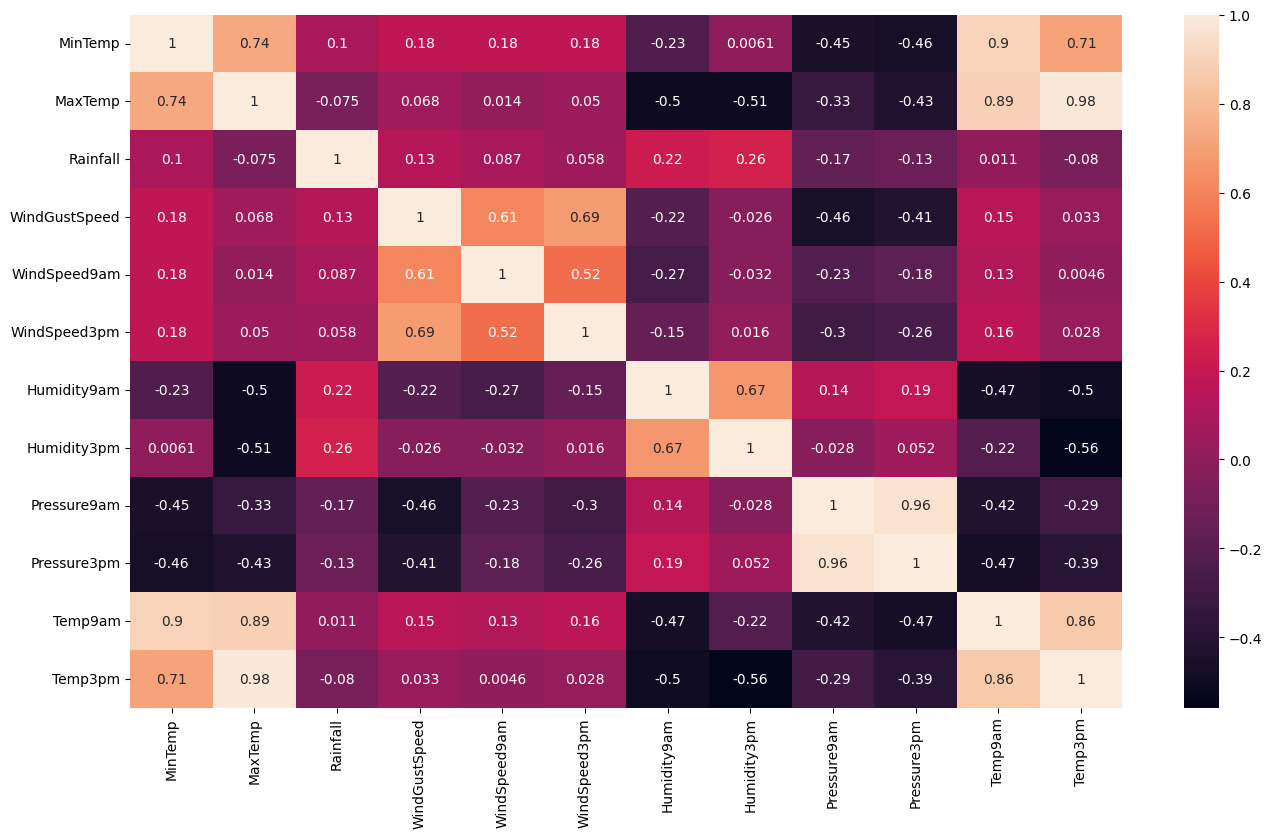

In [148]:
#correlation heatmap for numeric features
sns.heatmap(weather.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

# Dtata Preparing

In [149]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [150]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [151]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

In [152]:
weather = weather.sort_values(['Location', 'Date'])
weather = weather.set_index('Date')

In [153]:
weather

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-07-01,Adelaide,8.8,15.7,5.0,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,13.5,14.9,Yes,No
2008-07-02,Adelaide,12.7,15.8,0.8,SW,35.0,SSW,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,13.7,15.5,No,No
2008-07-03,Adelaide,6.2,15.1,0.0,W,20.0,NNE,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,9.3,13.9,No,No
2008-07-04,Adelaide,5.3,15.9,0.0,NNE,30.0,NNE,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,10.2,15.3,No,No
2008-07-05,Adelaide,9.8,15.4,0.0,N,30.0,NNE,NE,9.0,9.0,56.0,67.0,1023.6,1020.2,11.3,13.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Woomera,5.8,19.9,0.0,ENE,22.0,ESE,ESE,11.0,9.0,52.0,22.0,1027.9,1025.1,11.1,19.1,No,No
2017-06-22,Woomera,7.8,19.0,0.0,NNE,31.0,ENE,NNW,13.0,17.0,48.0,37.0,1025.8,1022.2,11.1,18.0,No,No
2017-06-23,Woomera,8.0,22.5,0.0,NNW,33.0,N,NW,13.0,15.0,57.0,31.0,1021.0,1018.2,11.5,21.5,No,No


In [155]:
weather['MaxTemp'] = ( weather.groupby('Location')['MaxTemp'] .transform(lambda x: x.interpolate(method='time')) ) 
weather['MinTemp'] = ( weather.groupby('Location')['MinTemp'] .transform(lambda x: x.interpolate(method='time')) ) 
weather['WindGustSpeed'] = ( weather.groupby('Location')['WindGustSpeed'] .transform(lambda x: x.interpolate(method='time')) ) 
weather['WindGustSpeed'] = ( weather.groupby('Location')['WindGustSpeed'] .ffill().bfill() ) 
weather['WindGustDir'] = ( weather.groupby('Location')['WindGustDir'] .transform(lambda x: x.fillna( x.mode().iloc[0] if not x.mode().empty else 'Unknown' )) ) 
weather['Rainfall'] = ( weather.groupby('Location')['Rainfall'] .transform(lambda x: x.interpolate()) ) 
weather['Rainfall'] = ( weather.groupby('Location')['Rainfall'] .ffill() .bfill() .fillna(0) ) 
temp_cols = ['MinTemp','MaxTemp','Temp9am','Temp3pm'] 
weather[temp_cols] = weather.groupby('Location')[temp_cols].transform( lambda x: x.interpolate().ffill().bfill() ) 
wind_speed_cols = ['WindSpeed9am','WindSpeed3pm'] 
weather[wind_speed_cols] = weather.groupby('Location')[wind_speed_cols].transform( lambda x: x.interpolate().ffill().bfill() ) 
weather['WindDir3pm'] = weather.groupby('Location')['WindDir3pm'] .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'N')) 
humidity_cols = ['Humidity9am','Humidity3pm'] 
weather[humidity_cols] = weather.groupby('Location')[humidity_cols].transform( lambda x: x.interpolate().ffill().bfill() ) 
weather['RainToday'] = weather['RainToday'].fillna(weather['RainToday'].mode()[0]) # If RainTomorrow is your target: 
weather = weather.dropna(subset=['RainTomorrow']) 
weather['Pressure9am'] = weather.groupby('Location')['Pressure9am'].transform(lambda x: x.interpolate(method='time')) 
weather['Pressure3pm'] = weather.groupby('Location')['Pressure3pm'].transform(lambda x: x.interpolate(method='time')) #nearest avalable value 
weather['Pressure9am'] = weather.groupby('Location')['Pressure9am'].ffill().bfill() 
weather['Pressure3pm'] = weather.groupby('Location')['Pressure3pm'].ffill().bfill() #drop wind_dir9 am 
weather.drop(columns=['WindDir9am'], inplace=True) 
weather

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,
2008-07-01,Adelaide,8.8,15.7,5.0,NW,48.0,W,13.0,15.0,92.0,67.0,1017.4,1017.7,13.5,14.9,Yes,No
2008-07-02,Adelaide,12.7,15.8,0.8,SW,35.0,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,13.7,15.5,No,No
2008-07-03,Adelaide,6.2,15.1,0.0,W,20.0,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,9.3,13.9,No,No
2008-07-04,Adelaide,5.3,15.9,0.0,NNE,30.0,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,10.2,15.3,No,No
2008-07-06,Adelaide,11.3,15.7,8.1,NNW,52.0,NNW,15.0,22.0,62.0,62.0,1019.5,1016.2,13.0,14.4,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Woomera,5.6,19.7,0.0,N,20.0,ESE,9.0,7.0,61.0,28.0,1028.1,1025.9,11.1,19.2,No,No
2017-06-21,Woomera,5.8,19.9,0.0,ENE,22.0,ESE,11.0,9.0,52.0,22.0,1027.9,1025.1,11.1,19.1,No,No
2017-06-22,Woomera,7.8,19.0,0.0,NNE,31.0,NNW,13.0,17.0,48.0,37.0,1025.8,1022.2,11.1,18.0,No,No


In [156]:
weather.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Feature scaling

In [157]:
# Filter by year 2011
weather_2011 = weather[weather.index.year == 2009]# Filter by year 2011


In [158]:
#Selecting important columns for clustering
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir','WindGustSpeed', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm']
weather_with_cols = weather_2011[cols]

In [159]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Columns to encode
cat_cols = ['WindGustDir', 'WindDir3pm']
# --- One-hot encoding ---
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap
cat_encoded = ohe.fit_transform(weather_with_cols[cat_cols])

# Get new column names after encoding
encoded_cols = ohe.get_feature_names_out(cat_cols)

# Create a DataFrame for encoded columns
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoded_cols, index=weather_with_cols.index)
# --- Combine numerical and encoded categorical data ---
final_df = pd.concat([weather_with_cols, cat_encoded_df], axis=1)
final_df=final_df.drop(columns=['WindGustDir', 'WindDir3pm'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_df)


In [160]:
df_scaled

array([[ 0.76632872, -0.04962325, -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182],
       [ 0.28216059,  0.1157719 , -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182],
       [ 0.26602166,  0.80491836, -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182],
       ...,
       [ 1.65397029,  2.12807956, -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182],
       [ 2.13813842,  2.38995522, -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182],
       [ 2.52547293,  2.48643572, -0.25054612, ..., -0.28983249,
        -0.26527144, -0.26941182]], shape=(16595, 43))

# K Mean Clustering

In [161]:
#Lists of metric results for each k cluster
inertia = []
silhouette_scores = []
K = range(2, 25) #Setting clusters between 2 and 11#Lists of metric results for each k cluster


In [162]:
for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [02:14<00:00,  5.83s/it]


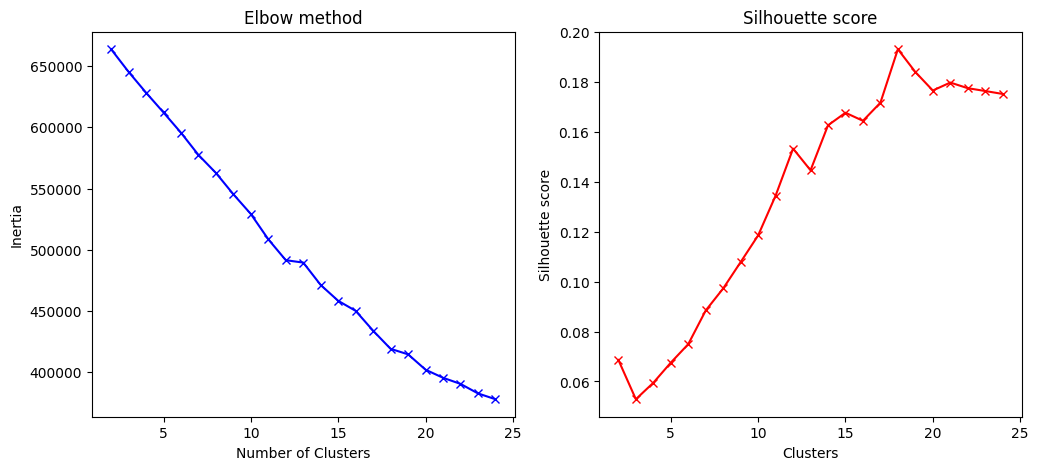

In [163]:
#Plotting Elbow and Silhouette methods to find best k as a subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

In [133]:
# Findinf best k and using that k for final KMeans
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Best amount of clusters: {optimal_k}")

Best amount of clusters: 16


In [134]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(df_scaled)

In [135]:
weather_2011['cluster'] = cluster_labels
weather_2011

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,cluster
Date,,,,,,,,,,,,,,,,,,
2009-01-01,Adelaide,16.9,22.9,0.0,SW,50.0,SW,17.0,20.0,58.0,40.0,1011.3,1012.4,18.1,22.5,No,No,0
2009-01-02,Adelaide,13.9,24.1,0.0,SE,37.0,ESE,17.0,13.0,39.0,25.0,1020.9,1018.5,16.1,22.7,No,No,2
2009-01-03,Adelaide,13.8,29.1,0.0,SW,30.0,SW,9.0,13.0,26.0,15.0,1017.6,1014.7,21.9,28.2,No,No,0
2009-01-04,Adelaide,15.1,33.3,0.0,W,31.0,SW,2.0,13.0,25.0,7.0,1013.8,1012.2,24.2,32.2,No,No,0
2009-01-05,Adelaide,14.6,30.5,0.0,SW,26.0,SW,4.0,15.0,28.0,22.0,1015.0,1013.2,22.3,29.2,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,Woomera,17.7,34.8,0.0,S,44.0,S,17.0,26.0,46.0,11.0,1016.4,1014.0,22.9,33.1,No,No,9
2009-12-28,Woomera,20.3,37.2,0.0,SE,56.0,SSW,20.0,7.0,30.0,9.0,1017.0,1014.6,26.9,35.6,No,No,2
2009-12-29,Woomera,22.4,38.7,0.0,SE,46.0,SE,31.0,13.0,21.0,7.0,1017.4,1014.2,28.0,37.2,No,No,2


In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

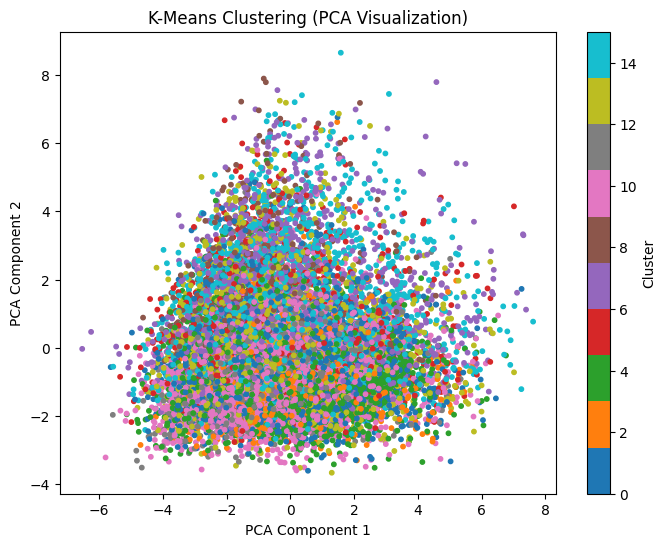

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=10
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Visualization)")
plt.colorbar(label="Cluster")
plt.show()

# DBSCAN

In [138]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
eps_values = np.arange(0.8, 1.6, 0.2)
min_samples_values = [5, 8]
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        # Number of clusters (ignore noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = list(labels).count(-1) / len(labels)

        # Silhouette only if valid
        if n_clusters >= 2:
            sil = silhouette_score(df_scaled, labels)
        else:
            sil = -1   # invalid

        results.append([eps, min_samples, n_clusters, noise_ratio, sil])

dbscan_results = pd.DataFrame(
    results,
    columns=["eps", "min_samples", "clusters", "noise_ratio", "silhouette"]
)

dbscan_results.sort_values("silhouette", ascending=False).head()

,eps,min_samples,clusters,noise_ratio,silhouette
1,0.8,8,2,0.998248,-0.019482
3,1.0,8,9,0.986059,-0.140230
0,0.8,5,9,0.992230,-0.150446
5,1.2,8,30,0.947817,-0.322533
6,1.4,5,155,0.761255,-0.323211


In [139]:
best_row = dbscan_results.sort_values("silhouette", ascending=False).iloc[0]

best_eps = best_row["eps"]
best_min_samples = int(best_row["min_samples"])

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

Best eps: 0.8
Best min_samples: 8


In [140]:
dbscan_final = DBSCAN(
    eps=best_eps,
    min_samples=best_min_samples,
    n_jobs=-1
)

dbscan_labels = dbscan_final.fit_predict(df_scaled)

In [141]:
weather_2011['dbscan_cluster'] = dbscan_labels
weather_2011

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,cluster,dbscan_cluster
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,Adelaide,16.9,22.9,0.0,SW,50.0,SW,17.0,20.0,58.0,40.0,1011.3,1012.4,18.1,22.5,No,No,0,-1
2009-01-02,Adelaide,13.9,24.1,0.0,SE,37.0,ESE,17.0,13.0,39.0,25.0,1020.9,1018.5,16.1,22.7,No,No,2,-1
2009-01-03,Adelaide,13.8,29.1,0.0,SW,30.0,SW,9.0,13.0,26.0,15.0,1017.6,1014.7,21.9,28.2,No,No,0,-1
2009-01-04,Adelaide,15.1,33.3,0.0,W,31.0,SW,2.0,13.0,25.0,7.0,1013.8,1012.2,24.2,32.2,No,No,0,-1
2009-01-05,Adelaide,14.6,30.5,0.0,SW,26.0,SW,4.0,15.0,28.0,22.0,1015.0,1013.2,22.3,29.2,No,No,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,Woomera,17.7,34.8,0.0,S,44.0,S,17.0,26.0,46.0,11.0,1016.4,1014.0,22.9,33.1,No,No,9,-1
2009-12-28,Woomera,20.3,37.2,0.0,SE,56.0,SSW,20.0,7.0,30.0,9.0,1017.0,1014.6,26.9,35.6,No,No,2,-1
2009-12-29,Woomera,22.4,38.7,0.0,SE,46.0,SE,31.0,13.0,21.0,7.0,1017.4,1014.2,28.0,37.2,No,No,2,-1


In [142]:
n_noise = np.sum(dbscan_labels == -1)
n_non_noise = np.sum(dbscan_labels != -1)

print("Noise points:", n_noise)
print("Non-noise points:", n_non_noise)

Noise points: 13104
Non-noise points: 23


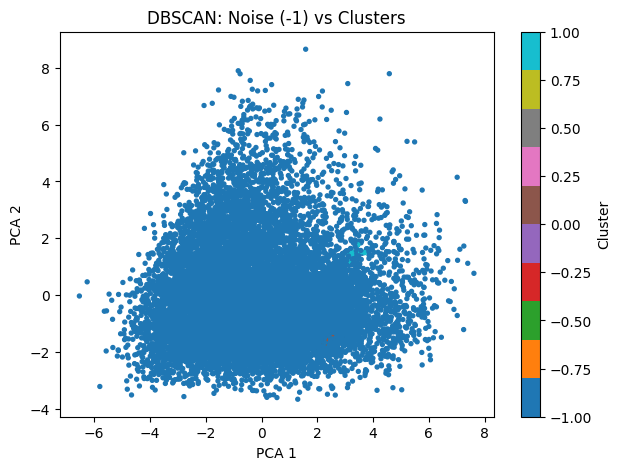

In [143]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=dbscan_labels,
    cmap='tab10',
    s=8
)
plt.title("DBSCAN: Noise (-1) vs Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [144]:
weather_2011['dbscan_cluster']

Date
2009-01-01   -1
2009-01-02   -1
2009-01-03   -1
2009-01-04   -1
2009-01-05   -1
             ..
2009-12-27   -1
2009-12-28   -1
2009-12-29   -1
2009-12-30   -1
2009-12-31   -1
Name: dbscan_cluster, Length: 13127, dtype: int64

In [145]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters:", n_clusters)

Number of clusters: 2


# K-Means with selected dates

In [165]:
weather['year'] = weather.index.year
weather['month'] = weather.index.month
weather

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
Date,,,,,,,,,,,,,,,,,,,
2008-07-01,Adelaide,8.8,15.7,5.0,NW,48.0,W,13.0,15.0,92.0,67.0,1017.4,1017.7,13.5,14.9,Yes,No,2008,7
2008-07-02,Adelaide,12.7,15.8,0.8,SW,35.0,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,13.7,15.5,No,No,2008,7
2008-07-03,Adelaide,6.2,15.1,0.0,W,20.0,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,9.3,13.9,No,No,2008,7
2008-07-04,Adelaide,5.3,15.9,0.0,NNE,30.0,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,10.2,15.3,No,No,2008,7
2008-07-06,Adelaide,11.3,15.7,8.1,NNW,52.0,NNW,15.0,22.0,62.0,62.0,1019.5,1016.2,13.0,14.4,No,Yes,2008,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Woomera,5.6,19.7,0.0,N,20.0,ESE,9.0,7.0,61.0,28.0,1028.1,1025.9,11.1,19.2,No,No,2017,6
2017-06-21,Woomera,5.8,19.9,0.0,ENE,22.0,ESE,11.0,9.0,52.0,22.0,1027.9,1025.1,11.1,19.1,No,No,2017,6
2017-06-22,Woomera,7.8,19.0,0.0,NNE,31.0,NNW,13.0,17.0,48.0,37.0,1025.8,1022.2,11.1,18.0,No,No,2017,6


In [166]:
numeric_cols= ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [171]:
df_2013 = weather[weather['year'] == 2014]
df_2013

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
Date,,,,,,,,,,,,,,,,,,,
2014-01-01,Adelaide,22.0,33.0,2.1,WSW,43.0,SSW,4.0,24.0,29.0,50.0,1006.1,1007.0,29.8,29.7,No,Yes,2014,1
2014-01-02,Adelaide,16.9,22.7,4.2,SE,33.0,E,4.0,17.0,92.0,67.0,1008.4,1005.1,17.8,21.2,Yes,No,2014,1
2014-01-03,Adelaide,15.2,22.6,0.8,WSW,48.0,SW,11.0,20.0,78.0,53.0,1009.5,1010.5,16.6,20.2,No,No,2014,1
2014-01-05,Adelaide,16.0,21.7,1.7,WSW,57.0,WSW,22.0,26.0,50.0,76.0,1010.9,1011.9,19.1,18.4,No,Yes,2014,1
2014-01-06,Adelaide,12.5,22.5,2.8,WSW,43.0,SW,20.0,15.0,45.0,32.0,1022.5,1022.6,16.4,21.1,Yes,No,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,Woomera,15.1,31.8,0.0,SSE,46.0,ENE,31.0,19.0,34.0,11.0,1017.4,1014.6,19.7,29.4,No,No,2014,12
2014-12-28,Woomera,17.8,35.1,0.0,SSW,46.0,WSW,13.0,20.0,34.0,12.0,1013.9,1009.6,23.6,32.6,No,No,2014,12
2014-12-29,Woomera,14.5,31.9,0.0,WSW,65.0,WSW,19.0,37.0,24.0,21.0,1011.3,1009.5,24.6,30.5,No,No,2014,12


In [172]:
# Groupping by city and month, computing mean and mode for applying clustering afterwards
grouped = df_2013.groupby(['Location', 'month'])
mean_df = grouped[numeric_cols].mean()

In [174]:
# Standardize and apply PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(mean_df)

In [175]:
pca = PCA(n_components=4)
scaled_pca = pca.fit_transform(scaled_df)

In [176]:
# Same as before, applying model, plotting the method results
# then with best k clustering the data and plotting the result
inertia_2 = []
silhouette_scores_2 = []
K_2 = range(2, 30)

In [177]:
for k in tqdm(K_2):
    kmeans_2 = KMeans(n_clusters=k, random_state=42)
    kmeans_2.fit(scaled_pca)
    inertia_2.append(kmeans_2.inertia_)
    score_2 = silhouette_score(scaled_pca, kmeans_2.labels_)
    silhouette_scores_2.append(score_2)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 45.65it/s]


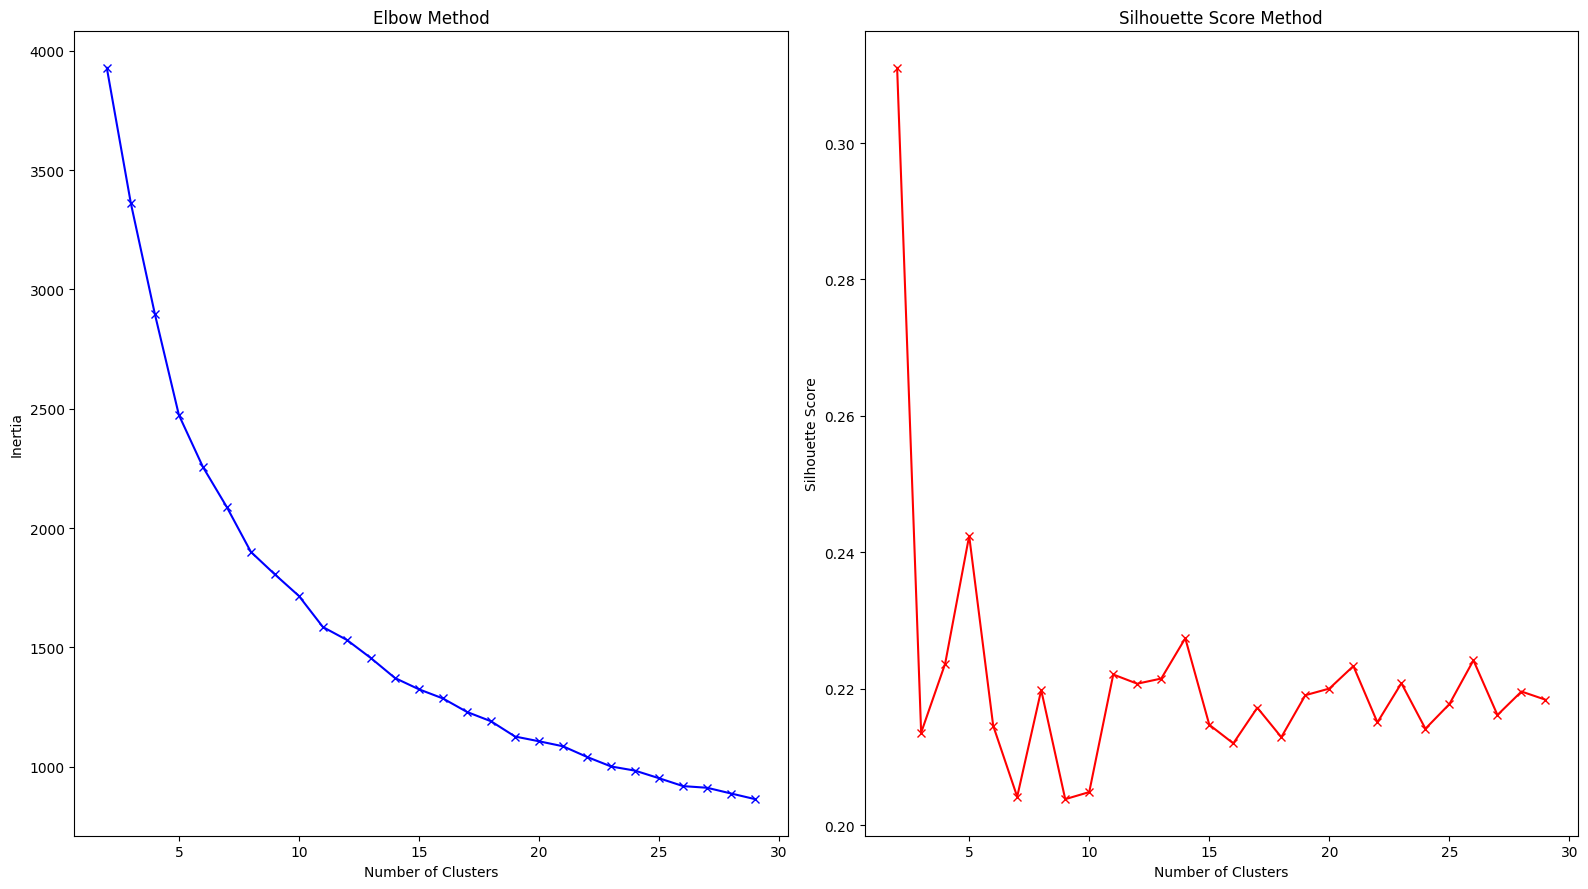

In [178]:
plt.subplot(1, 2, 1)
plt.plot(K_2, inertia_2, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1, 2, 2)
plt.plot(K_2, silhouette_scores_2, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.tight_layout()
plt.show()

In [179]:
optimal_k_2 = K_2[np.argmax(silhouette_scores_2)]
print(f"Best amount of clusters: {optimal_k_2}")

Best amount of clusters: 2


In [180]:
final_kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42)
cluster_labels_2 = final_kmeans_2.fit_predict(scaled_df)

In [181]:
mean_df['cluster'] = cluster_labels_2

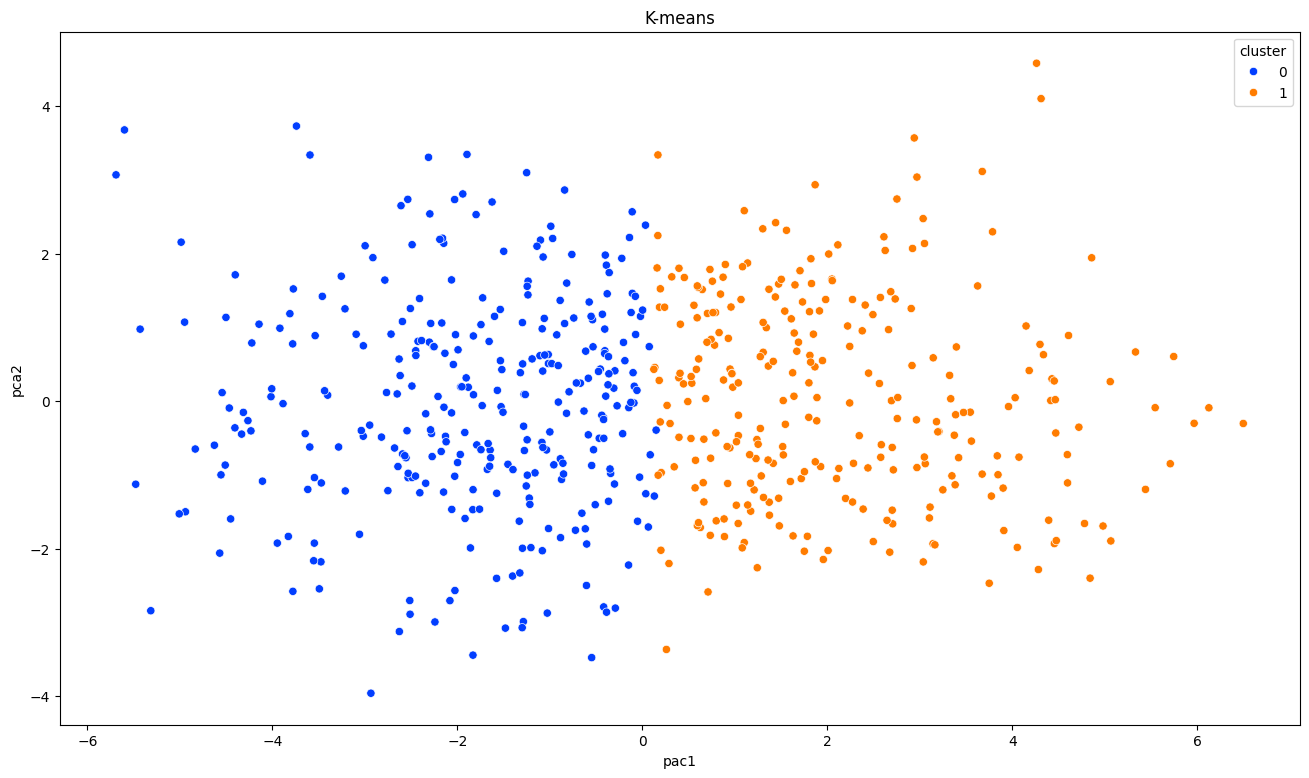

In [186]:
sns.scatterplot(x=scaled_pca[:, 0], y=scaled_pca[:, 1], hue=mean_df['cluster'], palette='bright')
plt.title('K-means')
plt.xlabel('pac1')
plt.ylabel('pca2')
plt.show()